In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

file_path = '/content/drive/MyDrive/(3439) Data Science/Projects/project2-team7/data/Copy of spotify_tracks.csv'

Mounted at /content/drive


In [106]:
df_main = pd.read_csv(file_path, low_memory=False)

# Help Balance Data (makes models WORSE)
# df_main = df_main[df_main['popularity'] > 0]

# Define your rule-based genre estimation function
def estimate_genre(row):
    bpm = row['tempo']
    energy = row['energy']
    danceability = row['danceability']
    acousticness = row['acousticness']
    speechiness = row['speechiness']
    instrumentalness = row['instrumentalness']
    year = row['year']
    loudness = row['loudness']

    # Pre-1950: Early genres only
    if year < 1950:
        if bpm < 80:
            return 'Folk' if acousticness > 0.6 else 'Ambient'
        else:
            return 'Jazz/Blues'

    # Pre-1970: No Hip-Hop or EDM/House
    if year < 1970:
        if bpm < 70:
            return 'Folk' if acousticness > 0.6 else 'Ambient'
        elif 70 <= bpm < 100:
            return 'Jazz/Blues' if acousticness > 0.4 else 'Pop'
        else:
            return 'Rock' if energy > 0.5 and instrumentalness > 0.1 else 'Pop'

    # Pre-1980: No EDM/House, Hip-Hop emerges
    if year < 1980:
        if bpm < 70:
            return 'Folk' if acousticness > 0.6 else 'Ambient'
        elif 70 <= bpm < 100:
            return 'Hip-Hop' if speechiness > 0.2 and danceability > 0.6 else 'Jazz/Blues'
        else:
            return 'Rock' if energy > 0.5 and instrumentalness > 0.1 else 'Pop'

    # 1980+: Full range
    if bpm < 70:  # Slow
        if acousticness > 0.6:
            return 'Folk'
        elif instrumentalness > 0.5:
            return 'Ambient'
        else:
            return 'Jazz/Blues'
    elif 70 <= bpm < 100:  # Moderate
        if speechiness > 0.2 and danceability > 0.65:
            return 'Hip-Hop'
        elif acousticness > 0.4:
            return 'Jazz/Blues'
        else:
            return 'Pop'
    elif 100 <= bpm < 120:  # Mid-high
        if danceability > 0.6 and loudness > -8:
            return 'Pop'
        elif energy > 0.6 and instrumentalness > 0.1:
            return 'Rock'
        else:
            return 'Jazz/Blues'
    elif 120 <= bpm < 160:  # Danceable
        if danceability > 0.65 and energy > 0.6 and loudness > -6:
            return 'EDM/House'
        elif energy > 0.6 and danceability < 0.5:
            return 'Rock'
        else:
            return 'Pop'
    else:  # Fast (160+)
        if energy > 0.7 and danceability < 0.5:
            return 'Rock'
        elif danceability > 0.6 and loudness > -6:
            return 'EDM/House'
        else:
            return 'Ambient'

# Create separate DataFrame for rule-based genre estimates (Estimate 1)
genre_estimate = pd.get_dummies(df_main.apply(estimate_genre, axis=1))

In [107]:
df = df_main
# df
# print(df.head())
# print(genre_df.head())
# print(texture_df.head())

<ipython-input-60-65f55d75c03f>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_df['Correlation'], y=correlation_df['Feature'], palette=colors)


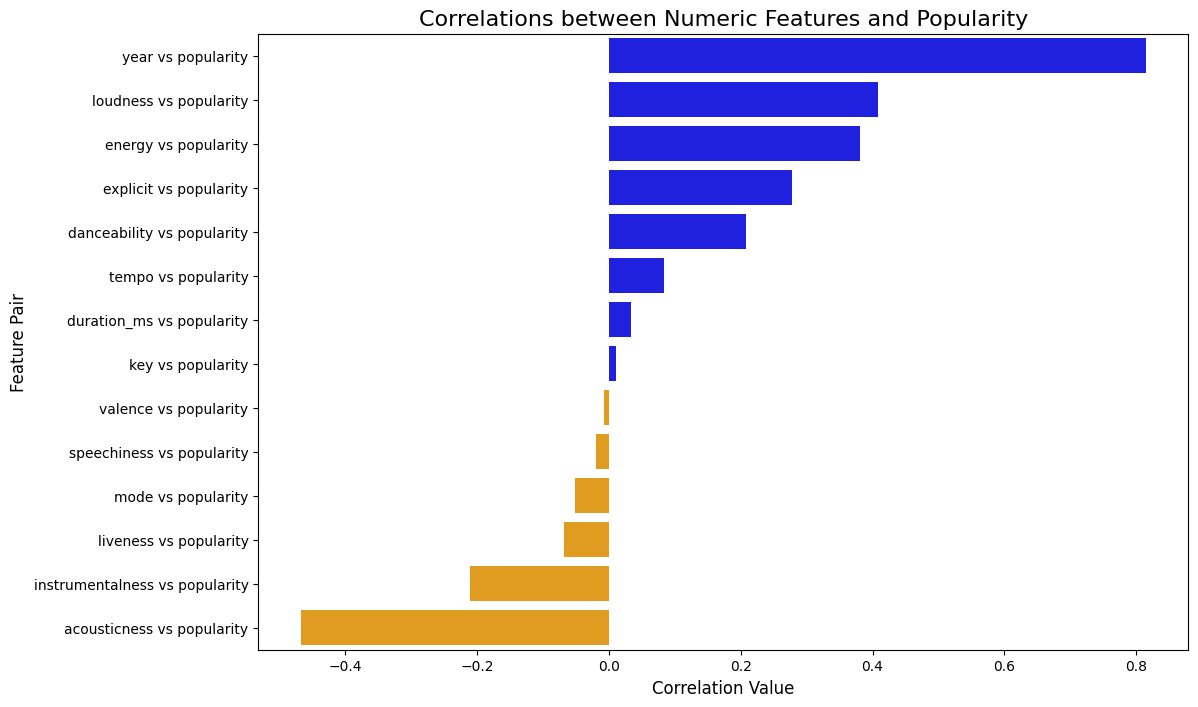

In [60]:
# List of numeric columns you want to calculate correlations for (excluding non-numeric or categorical columns like 'artists', 'name', etc.)
numeric_columns = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness',
                   'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo']

# Calculate correlation with popularity
corr_values = []
labels = []

for column in numeric_columns:
    correlation_value = df[column].corr(df['popularity'])
    corr_values.append(round(correlation_value, 3))
    labels.append(f"{column} vs popularity")

# Combine correlations and labels into a DataFrame to sort by correlation value
correlation_df = pd.DataFrame({'Feature': labels, 'Correlation': corr_values})

# Sort the DataFrame by Correlation in descending order
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# Print the results
# print("Correlations between Features and Popularity (sorted by strength):")
# for index, row in correlation_df.iterrows():
#     print(f"{row['Feature']}: {row['Correlation']}")

# Create a color list based on the sign of the correlation
colors = ['blue' if value >= 0 else 'orange' for value in correlation_df['Correlation']]

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_df['Correlation'], y=correlation_df['Feature'], palette=colors)

# Add titles and labels
plt.title("Correlations between Numeric Features and Popularity", fontsize=16)
plt.xlabel("Correlation Value", fontsize=12)
plt.ylabel("Feature Pair", fontsize=12)

# Show the plot
plt.show()

Linear Regression, Nearest Neighbor,

<ipython-input-84-bca8b1785716>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts_graph.index, y=genre_counts_graph.values, palette='viridis')


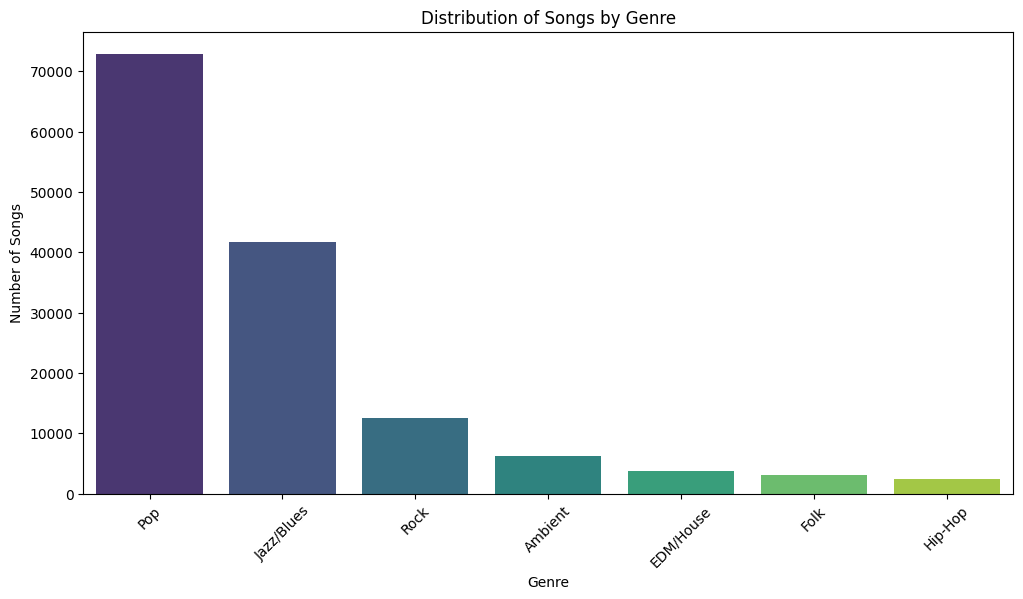

In [84]:
# Count the number of songs for each genre (sum across columns)
genre_counts_graph = genre_estimate.sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts_graph.index, y=genre_counts_graph.values, palette='viridis')
plt.xlabel("Genre")
plt.ylabel("Number of Songs")
plt.title("Distribution of Songs by Genre")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

Correlations between Genres and Popularity (sorted by strength):
Pop vs popularity: 0.237
EDM/House vs popularity: 0.162
Rock vs popularity: 0.114
Ambient vs popularity: 0.112
Hip-Hop vs popularity: 0.098
Folk vs popularity: -0.225
Jazz/Blues vs popularity: -0.329


<ipython-input-112-7e6c1ee98c5e>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_df['Correlation'], y=correlation_df['Feature'], palette=colors)


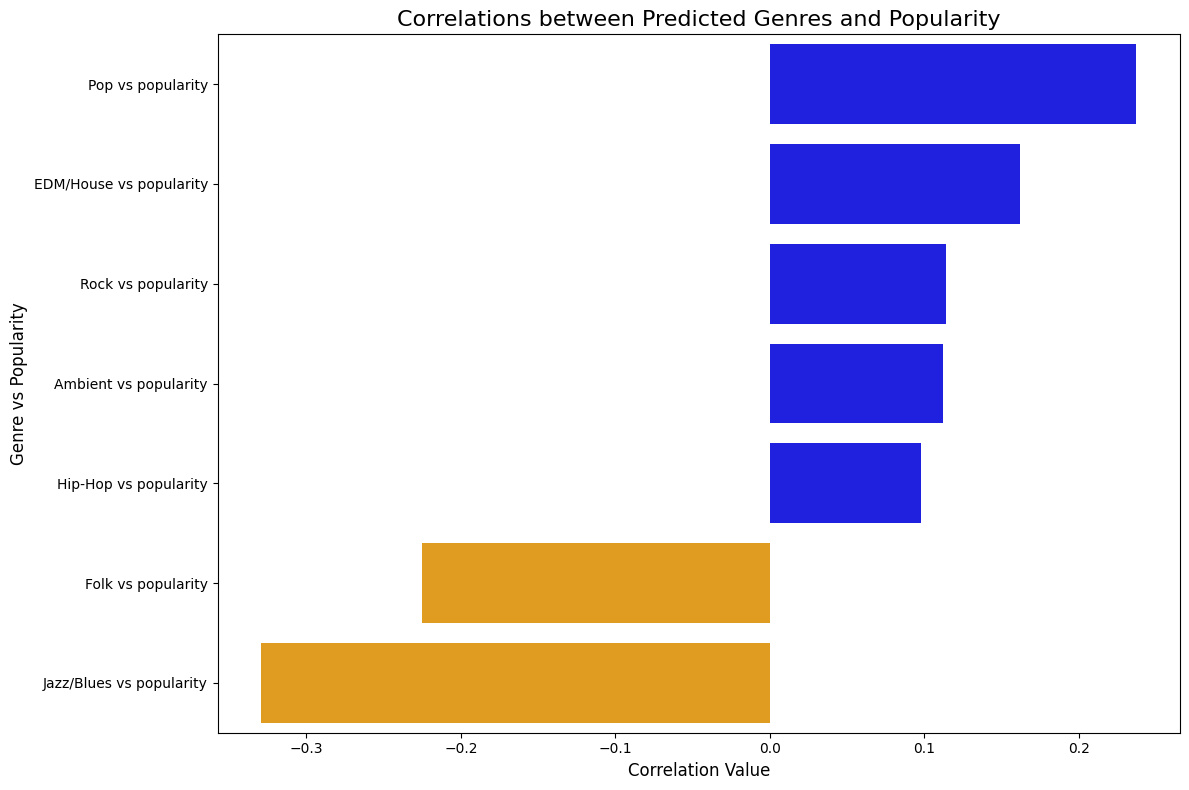

In [112]:
import pandas as pd
from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_main and genre_estimate2 are available
# Combine popularity with genre estimates
data_with_genre = pd.concat([df_main[['popularity']], genre_estimate], axis=1)

# Calculate point-biserial correlation for each genre
corr_values = []
labels = []
for genre in genre_estimate.columns:
    corr, p_value = pointbiserialr(data_with_genre[genre], data_with_genre['popularity'])
    corr_values.append(round(corr, 3))  # Round to 3 decimal places like your example
    labels.append(f"{genre} vs popularity")

# Create a DataFrame of correlations
correlation_df = pd.DataFrame({'Feature': labels, 'Correlation': corr_values})

# Sort by correlation value in descending order
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# Print the results
print("Correlations between Genres and Popularity (sorted by strength):")
for index, row in correlation_df.iterrows():
    print(f"{row['Feature']}: {row['Correlation']}")

# Create a color list based on the sign of the correlation
colors = ['blue' if value >= 0 else 'orange' for value in correlation_df['Correlation']]

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))  # Match your 12x8 figure size
sns.barplot(x=correlation_df['Correlation'], y=correlation_df['Feature'], palette=colors)

# Add titles and labels
plt.title("Correlations between Predicted Genres and Popularity", fontsize=16)
plt.xlabel("Correlation Value", fontsize=12)
plt.ylabel("Genre vs Popularity", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

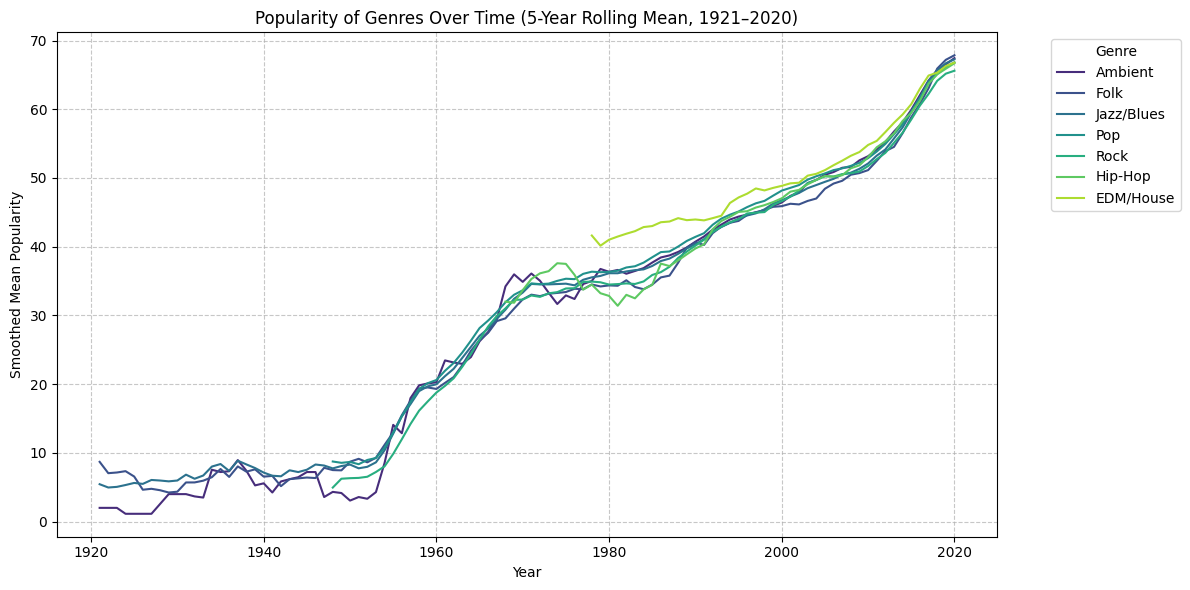

In [86]:
# Assuming df_main and genre_df are defined
# Step 1: Combine data
data = df_main[['year', 'popularity']].copy()
data = pd.concat([data, genre_estimate], axis=1)

# Step 2: Melt to long format
data_long = data.melt(id_vars=['year', 'popularity'],
                      value_vars=genre_estimate.columns,
                      var_name='Genre',
                      value_name='IsGenre')
data_long = data_long[data_long['IsGenre'] == 1].drop(columns='IsGenre')

# Step 3: Smoothed Mean (rolling average to reduce outlier effect)
# Group by year and genre, calculate mean popularity
popularity_by_year_genre_mean = data_long.groupby(['year', 'Genre'])['popularity'].mean().reset_index()
# Pivot to wide format, apply rolling mean, then back to long format
pivot_data = popularity_by_year_genre_mean.pivot(index='year', columns='Genre', values='popularity')
smoothed_pivot = pivot_data.rolling(window=5, min_periods=1, center=True).mean()
popularity_by_year_genre_smooth = smoothed_pivot.stack().reset_index().rename(columns={0: 'popularity'})

# Step 4: Plot with Seaborn lineplot (smoothed only)
plt.figure(figsize=(12, 6))
sns.lineplot(data=popularity_by_year_genre_smooth, x='year', y='popularity', hue='Genre',
             palette='viridis')

# Customize the plot
plt.xlabel("Year")
plt.ylabel("Smoothed Mean Popularity")
plt.title("Popularity of Genres Over Time (5-Year Rolling Mean, 1921–2020)")
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Modeling

In [10]:
# Linear Regression Model:
#-----------------------------------------
from sklearn.linear_model import LinearRegression

def train_linear_regression(X, y, test_size=0.2, random_state=42):
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    return model, X_test, y_test
#-----------------------------------------

# Random Forest Regressor Model:
#-----------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

def train_random_forest(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Train the Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=random_state)
    model.fit(X_train, y_train)

    return model, X_test, y_test
#-----------------------------------------

# Neural Network Model:
#-----------------------------------------
from sklearn.neural_network import MLPRegressor

def train_mlp(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Train the Multi-layer Perceptron Regressor
    model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=random_state)
    model.fit(X_train, y_train)

    return model, X_test, y_test
#-----------------------------------------

from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_model(model, X_test, y_test, y_pred):
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    r2_score = model.score(X_test, y_test)
    rmse = mean_squared_error(y_test, y_pred)
    mape = (abs(y_test - y_pred) / y_test).mean() * 100

    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2_score}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Percentage Error: {mape:.2f}%")


def visualize_predictions(y_test, y_pred):
    # Predict popularity on test data and visualize
    comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

    # Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=comparison_df['Actual'], y=comparison_df['Predicted'], alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 1:1 line

    # Labels
    plt.xlabel("Actual Popularity")
    plt.ylabel("Predicted Popularity")
    plt.title("Actual vs Predicted Popularity")
    plt.show()

# Linear Regression Model

Mean Absolute Error: 7.9820478120565
R-squared: 0.7593584599436458
Root Mean Squared Error: 115.1511322712486
Mean Absolute Percentage Error: inf%


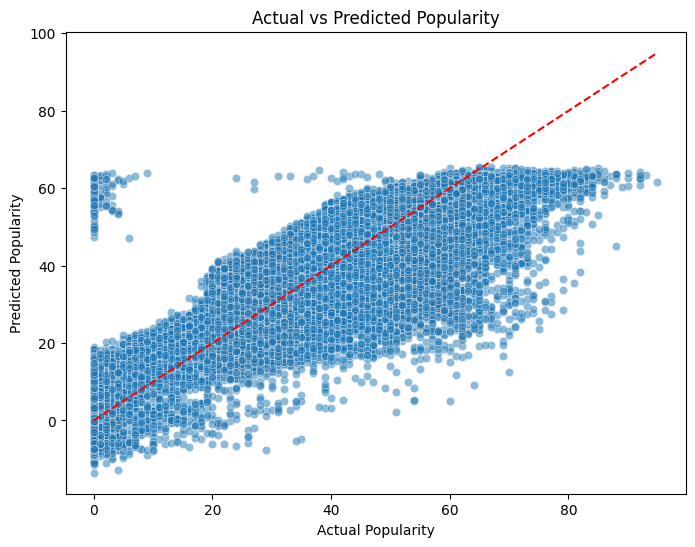

In [103]:
df = df_main

# Features and target variable
X = df[['year', 'energy', 'loudness', 'danceability', 'explicit', 'tempo', 'duration_ms', 'valence', 'key', 'mode', 'liveness', 'speechiness', 'instrumentalness', 'acousticness']]  # Features
y = df['popularity']  # Target variable

# Train the model
model, X_test, y_test = train_linear_regression(X, y)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
evaluate_model(model, X_test, y_test, y_pred)
# Visualize the predictions
visualize_predictions(y_test, y_pred)

<ipython-input-27-abeb52ad6c63>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance["Coefficient"], y=feature_importance["Feature"], palette=colors)


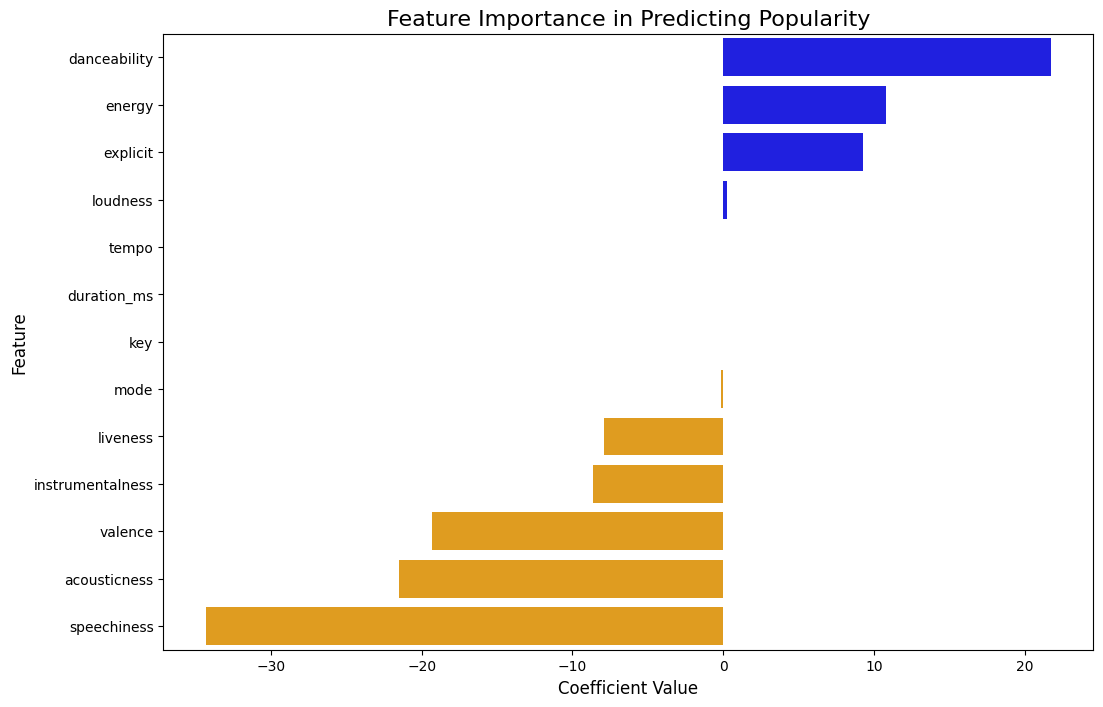

In [ ]:
# Get feature importance (coefficients)
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

# Sort by absolute value to see most impactful features
feature_importance["Abs_Coefficient"] = feature_importance["Coefficient"]
feature_importance = feature_importance.sort_values(by="Abs_Coefficient", ascending=False)

# Define color mapping: Blue for positive, Orange for negative
colors = ['blue' if coef > 0 else 'orange' for coef in feature_importance["Coefficient"]]

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance["Coefficient"], y=feature_importance["Feature"], palette=colors)

# Add titles and labels
plt.title("Feature Importance in Predicting Popularity", fontsize=16)
plt.xlabel("Coefficient Value", fontsize=12)
plt.ylabel("Feature", fontsize=12)

# Show the plot
plt.show()

# Random Forest Regressor Model

Mean Absolute Error: 10.388404644700021
R-squared: 0.6055326645947834
Root Mean Squared Error: 188.75943158149542
Mean Absolute Percentage Error: inf%


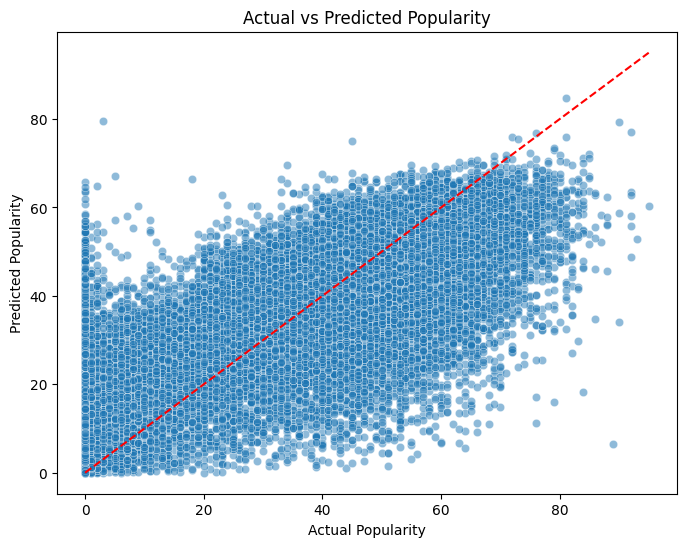

In [ ]:
df = df_main

# Features and target variable
X = df[['energy', 'loudness', 'danceability', 'explicit', 'tempo', 'duration_ms', 'valence', 'key', 'mode', 'liveness', 'speechiness', 'instrumentalness', 'acousticness']]  # Features
y = df['popularity']  # Target variable

# Train the model
model, X_test, y_test = train_random_forest(X, y)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
evaluate_model(model, X_test, y_test, y_pred)
# Visualize the predictions
visualize_predictions(y_test, y_pred)

<ipython-input-31-3d01b69bb3b3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_df["Importance"], y=feat_df["Feature"], palette=colors)


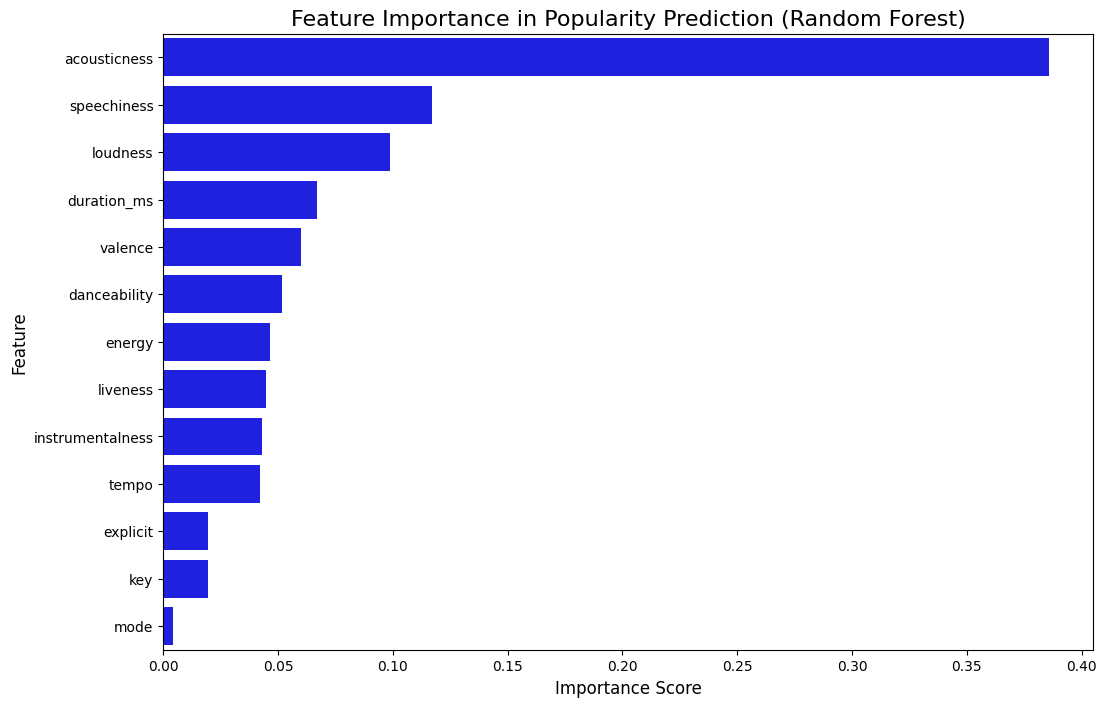

In [ ]:
# Get feature importance from Random Forest model
feature_importance = model.feature_importances_
features = X.columns

# Create DataFrame for sorting and visualization
feat_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Sort by importance
feat_df = feat_df.sort_values(by="Importance", ascending=False)

# Define color mapping: Blue for high importance, Orange for lower importance
colors = ['blue' if imp >= 0 else 'orange' for imp in feat_df["Importance"]]  # (No negatives in RF, but can be adapted)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=feat_df["Importance"], y=feat_df["Feature"], palette=colors)

# Add titles and labels
plt.title("Feature Importance in Popularity Prediction (Random Forest)", fontsize=16)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)

# Show the plot
plt.show()